In [1]:
import pandas as pd
import json 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import linregress

In [2]:
nba68 = pd.read_csv('nba1968.csv')
nba68.head()

,Player,Pos,Ht,Wt
0,NaN,NaN,NaN,NaN
1,Wilt Chamberlain\chambwi01,C,7-1,275.0
2,Larry Costello\costela01,PG,6-1,186.0
3,Billy Cunningham\cunnibi01,SF,6-6,210.0
4,Ron Filipek\filipro01,F,6-5,205.0


In [3]:
nba68[['Player']] = nba68.Player.str.split('\\', expand = True)[0]
nba68.drop_duplicates(subset=['Player'], keep=False)
nba1968 = nba68.drop(nba68.index[0])
nba68.head()

,Player,Pos,Ht,Wt
0,NaN,NaN,NaN,NaN
1,Wilt Chamberlain,C,7-1,275.0
2,Larry Costello,PG,6-1,186.0
3,Billy Cunningham,SF,6-6,210.0
4,Ron Filipek,F,6-5,205.0


In [4]:
nba1968 = nba68.drop(nba68.index[0])

In [5]:
nba1968[['Ht','Ht(in)']] = nba1968['Ht'].str.split('-',expand=True)
nba1968[['Ht', 'Ht(in)']] = nba1968[['Ht', 'Ht(in)']].apply(pd.to_numeric, errors='coerce', axis=1)
nba1968['Ht'] = nba1968['Ht']*12
nba1968["Height(in)"] = nba1968["Ht"] + nba1968["Ht(in)"]
nba1968.rename(columns={"Pos" : "Position"}, inplace=True)

In [6]:
Avg_1968 = nba1968.groupby(["Position"]).mean()
avgnba68 = Avg_1968[["Height(in)", "Wt"]]
print("These are the average Height and Weight per postion for the 1968 NBA/ABA Season")
print(avgnba68)
print("----------------------------------------------------")
print("These are the averages per player for the 1968 NBA/ABA Season")
print(nba1968.mean())

These are the average Height and Weight per postion for the 1968 NBA/ABA Season
          Height(in)          Wt
Position                        
C          81.666667  226.433333
F          78.692308  211.666667
F-C        79.000000  218.000000
F-G        76.000000  200.000000
G          74.000000  185.333333
PF         79.354839  216.774194
PG         73.684211  182.929825
SF         77.896552  208.965517
SG         75.063492  189.841270
----------------------------------------------------
These are the averages per player for the 1968 NBA/ABA Season
Ht             72.220859
Wt            204.852308
Ht(in)          5.282209
Height(in)     77.503067
dtype: float64


In [7]:
filepath = os.path.join("draftcombineplayeranthro.json")
with open(filepath) as jsonfile:
    draft_json = json.load(jsonfile)

draft_json

{'parameters': {'LeagueID': '00', 'SeasonYear': '2018-19'},
 'resource': 'draftcombineplayeranthro',
 'resultSets': [{'headers': ['TEMP_PLAYER_ID',
    'PLAYER_ID',
    'FIRST_NAME',
    'LAST_NAME',
    'PLAYER_NAME',
    'POSITION',
    'HEIGHT_WO_SHOES',
    'HEIGHT_WO_SHOES_FT_IN',
    'HEIGHT_W_SHOES',
    'HEIGHT_W_SHOES_FT_IN',
    'WEIGHT',
    'WINGSPAN',
    'WINGSPAN_FT_IN',
    'STANDING_REACH',
    'STANDING_REACH_FT_IN',
    'BODY_FAT_PCT',
    'HAND_LENGTH',
    'HAND_WIDTH'],
   'name': 'Results',
   'rowSet': [[1628959,
     1628959,
     'Rawle',
     'Alkins',
     'Rawle Alkins',
     'SG',
     74.75,
     "6' 2.75''",
     76.25,
     "6' 4.25''",
     '217.4',
     80.75,
     "6' 8.75''",
     99.0,
     "8' 3''",
     8.9,
     8.5,
     10.0],
    [1628960,
     1628960,
     'Grayson',
     'Allen',
     'Grayson Allen',
     'SG',
     75.0,
     "6' 3''",
     76.5,
     "6' 4.5''",
     '198',
     79.25,
     "6' 7.25''",
     97.0,
     "8' 1''",
     5.

In [8]:
df = pd.DataFrame.from_dict(draft_json['resultSets'][0]['rowSet'], orient='columns')
table = df[[4, 5, 6, 8, 10, 11]]
table.columns = ['Name', 'Position', 'Height(in) w/o Shoes', 'Height w/ Shoes', 'Weight', 'Wingspan']
table.head(10)

,Name,Position,Height(in) w/o Shoes,Height w/ Shoes,Weight,Wingspan
0,Rawle Alkins,SG,74.75,76.25,217.4,80.75
1,Grayson Allen,SG,75.00,76.50,198,79.25
2,Kostas Antetokounmpo,PF,81.00,82.50,194.8,86.25
3,Udoka Azubuike,C,82.00,84.25,273.8,91.00
4,Mohamed Bamba,C,83.25,84.75,225.6,94.00
5,Jaylen Barford,PG-SG,73.25,74.25,207.6,75.50
6,Keita Bates-Diop,SG-SF,79.25,80.50,223.8,87.25
7,Tyus Battle,SG,77.00,78.75,200.2,81.00
8,Brian Bowen,SG-SF,78.25,79.50,202,82.25
9,Miles Bridges,SF,77.25,78.75,220.4,81.50


In [9]:
table[['Weight']] = table[['Weight']].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Users\pinkp\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [10]:
table['Position']=table['Position'].replace(to_replace='C-PF', value='F-C')
table['Position']=table['Position'].replace(to_replace='PF-C', value='F-C')
table['Position']=table['Position'].replace(to_replace='SG-SF', value='F-G')
table['Position']=table['Position'].replace(to_replace='PG-SG', value='G')
table['Position']=table['Position'].replace(to_replace='SF-PF', value='F')
table['Position']=table['Position'].replace(to_replace='SF-SG', value='F-G')
table['Position']=table['Position'].replace(to_replace='SG-PG', value='G')

C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [11]:
nbacombine2018 = table.groupby(["Position"]).mean()
combine_height2018 = nbacombine2018[["Height(in) w/o Shoes", "Height w/ Shoes", "Weight", "Wingspan"]]
combine_height2018

,Height(in) w/o Shoes,Height w/ Shoes,Weight,Wingspan
Position,,,,
C,81.928571,83.357143,254.485714,88.750000
F,81.500000,82.750000,211.000000,84.250000
F-C,80.964286,82.214286,240.628571,85.857143
F-G,77.075000,78.400000,204.800000,82.550000
G,74.750000,75.850000,197.160000,80.600000
PF,79.571429,80.821429,216.171429,86.107143
PG,73.307692,74.557692,188.076923,78.461538
SF,78.250000,79.500000,209.280000,81.800000
SG,75.767857,77.089286,199.942857,80.482143


In [12]:
filepath2 = os.path.join("draftcombineplayeranthro08.json")
with open(filepath2) as jsonfile:
    draft_json2 = json.load(jsonfile)

draft_json2

{'parameters': {'LeagueID': '00', 'SeasonYear': '2007-08'},
 'resource': 'draftcombineplayeranthro',
 'resultSets': [{'headers': ['TEMP_PLAYER_ID',
    'PLAYER_ID',
    'FIRST_NAME',
    'LAST_NAME',
    'PLAYER_NAME',
    'POSITION',
    'HEIGHT_WO_SHOES',
    'HEIGHT_WO_SHOES_FT_IN',
    'HEIGHT_W_SHOES',
    'HEIGHT_W_SHOES_FT_IN',
    'WEIGHT',
    'WINGSPAN',
    'WINGSPAN_FT_IN',
    'STANDING_REACH',
    'STANDING_REACH_FT_IN',
    'BODY_FAT_PCT',
    'HAND_LENGTH',
    'HAND_WIDTH'],
   'name': 'Results',
   'rowSet': [[None,
     12204,
     'Mohamed',
     'Abukar',
     'Mohamed Abukar',
     'SF',
     80.0,
     "6' 8''",
     81.75,
     "6' 9.75''",
     '210',
     81.0,
     "6' 9''",
     103.0,
     "8' 7''",
     8.9,
     None,
     None],
    [None,
     12205,
     'Mario',
     'Boggan',
     'Mario Boggan',
     'PF',
     77.0,
     "6' 5''",
     79.0,
     "6' 7''",
     '240',
     86.0,
     "7' 2''",
     107.0,
     "8' 11''",
     9.2,
     None,
     N

In [13]:
df2 = pd.DataFrame.from_dict(draft_json2['resultSets'][0]['rowSet'], orient='columns')
table2 = df2[[4, 5, 6, 8, 10, 11]]
table2.columns = ['Name', 'Position', 'Height(in) w/o Shoes', 'Height w/ Shoes', 'Weight', 'Wingspan']
table2.head(10)

,Name,Position,Height(in) w/o Shoes,Height w/ Shoes,Weight,Wingspan
0,Mohamed Abukar,SF,80.0,81.75,210,81.00
1,Mario Boggan,PF,77.0,79.00,240,86.00
2,Craig Bradshaw,PF,80.0,81.75,240,85.50
3,Corey Brewer,SF-SG,78.0,79.75,185,80.25
4,Aaron Brooks,PG,70.0,71.75,161,76.00
5,Bobby Brown,PG,71.0,73.75,170,76.00
6,Russell Carter,SG,75.0,76.50,221,80.50
7,Coleman Collins,PF,80.0,81.75,236,86.00
8,Mike Conley,PG,71.0,72.75,175,77.75
9,Daequan Cook,SG,75.0,77.75,203,80.25


In [14]:
table2[['Weight']] = table2[['Weight']].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Users\pinkp\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [15]:
table2['Position']=table2['Position'].replace(to_replace='C-PF', value='F-C')
table2['Position']=table2['Position'].replace(to_replace='PF-C', value='F-C')
table2['Position']=table2['Position'].replace(to_replace='SG-SF', value='F-G')
table2['Position']=table2['Position'].replace(to_replace='PG-SG', value='G')
table2['Position']=table2['Position'].replace(to_replace='SF-PF', value='F')
table2['Position']=table2['Position'].replace(to_replace='SF-SG', value='F-G')
table2['Position']=table2['Position'].replace(to_replace='SG-PG', value='G')

C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [16]:
nbacombine2008 = table2.groupby(["Position"]).mean()
combine_height2008 = nbacombine2008[["Height(in) w/o Shoes", "Height w/ Shoes", "Weight", "Wingspan"]]
combine_height2008 = combine_height2008.drop(combine_height2008.index[0])
combine_height2008

,Height(in) w/o Shoes,Height w/ Shoes,Weight,Wingspan
Position,,,,
C,81.406250,83.156250,245.125000,86.468750
F,79.750000,81.375000,213.000000,87.500000
F-C,79.875000,81.125000,249.500000,86.625000
F-G,77.333333,79.416667,202.000000,82.500000
G,75.375000,76.625000,205.500000,81.125000
PF,79.829545,81.500000,231.454545,85.125000
PG,72.283333,74.050000,178.800000,76.216667
SF,78.272727,79.931818,218.000000,82.454545
SG,75.522727,77.568182,205.181818,79.977273


In [17]:
filepath3 = os.path.join("draftcombineplayeranthro00.json")
with open(filepath3) as jsonfile:
    draft_json3 = json.load(jsonfile)

draft_json3

{'parameters': {'LeagueID': '00', 'SeasonYear': '2000-01'},
 'resource': 'draftcombineplayeranthro',
 'resultSets': [{'headers': ['TEMP_PLAYER_ID',
    'PLAYER_ID',
    'FIRST_NAME',
    'LAST_NAME',
    'PLAYER_NAME',
    'POSITION',
    'HEIGHT_WO_SHOES',
    'HEIGHT_WO_SHOES_FT_IN',
    'HEIGHT_W_SHOES',
    'HEIGHT_W_SHOES_FT_IN',
    'WEIGHT',
    'WINGSPAN',
    'WINGSPAN_FT_IN',
    'STANDING_REACH',
    'STANDING_REACH_FT_IN',
    'BODY_FAT_PCT',
    'HAND_LENGTH',
    'HAND_WIDTH'],
   'name': 'Results',
   'rowSet': [[None,
     2124,
     'Malik',
     'Allen',
     'Malik Allen',
     'PF-C',
     80.25,
     "6' 8.25''",
     None,
     None,
     '271',
     86.5,
     "7' 2.5''",
     109.0,
     "9' 1''",
     None,
     None,
     None],
    [None,
     12019,
     'Harold',
     'Arceneaux',
     'Harold Arceneaux',
     'SG-SF',
     76.5,
     "6' 4.5''",
     None,
     None,
     '219',
     80.5,
     "6' 8.5''",
     103.0,
     "8' 7''",
     None,
     None,
 

In [18]:
df3 = pd.DataFrame.from_dict(draft_json3['resultSets'][0]['rowSet'], orient='columns')
table3 = df3[[4, 5, 6, 10, 11]]
table3.columns = ['Name', 'Position', 'Height(in) w/o Shoes', 'Weight', 'Wingspan']
table3.head(10)

,Name,Position,Height(in) w/o Shoes,Weight,Wingspan
0,Malik Allen,PF-C,80.25,271,86.50
1,Harold Arceneaux,SG-SF,76.50,219,80.50
2,Lamont Barnes,PF-C,80.50,235.5,87.50
3,Mario Bland,PF,77.50,287,84.00
4,Primoz Brezec,C,84.75,243,86.00
5,Ernest Brown,C,82.00,222.5,85.25
6,Speedy Claxton,PG,70.50,166,72.00
7,Eric Coley,SG-SF,76.00,205,83.00
8,Ed Cota,PG,72.25,189,76.00
9,Schea Cotton,SF,76.25,219.5,79.00


In [19]:
table3[['Weight']] = table3[['Weight']].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Users\pinkp\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [20]:
table3['Position']=table3['Position'].replace(to_replace='C-PF', value='F-C')
table3['Position']=table3['Position'].replace(to_replace='PF-C', value='F-C')
table3['Position']=table3['Position'].replace(to_replace='SG-SF', value='F-G')
table3['Position']=table3['Position'].replace(to_replace='PG-SG', value='G')
table3['Position']=table3['Position'].replace(to_replace='SF-PF', value='F')
table3['Position']=table3['Position'].replace(to_replace='SF-SG', value='F-G')
table3['Position']=table3['Position'].replace(to_replace='SG-PG', value='G')
table3['Position']=table3['Position'].replace(to_replace='PF-SF', value='F')

C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [21]:
nbacombine2000 = table3.groupby(["Position"]).mean()
combine_height2000 = nbacombine2000[["Height(in) w/o Shoes", "Weight", "Wingspan"]]
combine_height2000

,Height(in) w/o Shoes,Weight,Wingspan
Position,,,
C,83.437500,224.375000,86.437500
F,78.350000,233.900000,83.200000
F-C,81.277778,253.500000,85.416667
F-G,77.194444,208.111111,81.583333
G,74.071429,183.071429,78.428571
PF,79.833333,240.000000,83.416667
PG,72.020833,181.625000,75.083333
SF,78.928571,211.642857,80.285714
SG,76.000000,205.833333,79.666667


In [22]:
positions1 = pd.merge(combine_height2018, avgnba68, how='outer', left_index=True, right_index=True)
positions1 = positions1.rename(columns={
    "Height(in) w/o Shoes" : "Height w/o Shoes 2018",
    "Height w/ Shoes" : "Height 2018",
    "Height(in)" : "Height 1968",
    "Weight": "Weight 2018",
    "Wt" : "Weight 1968", 
    "Wingspan" : "Wingspan 2018"
})
positions2 = pd.merge(positions1, combine_height2008, how='outer', left_index=True, right_index=True)
positions2 = positions2.rename(columns={
    "Height(in) w/o Shoes" : "Height w/o Shoes 2008",
    "Height w/ Shoes" : "Height 2008",
    "Weight": "Weight 2008",
    "Wingspan" : "Wingspan 2008"
})
positions = pd.merge(positions2, combine_height2000, how='outer', left_index= True, right_index=True)
positions = positions.rename(columns={
    "Height(in) w/o Shoes" : "Height 2000",
    "Weight": "Weight 2000",
    "Wingspan" : "Wingspan 2000"
})
positions

,Height w/o Shoes 2018,Height 2018,Weight 2018,Wingspan 2018,Height 1968,Weight 1968,Height w/o Shoes 2008,Height 2008,Weight 2008,Wingspan 2008,Height 2000,Weight 2000,Wingspan 2000
Position,,,,,,,,,,,,,
C,81.928571,83.357143,254.485714,88.750000,81.666667,226.433333,81.406250,83.156250,245.125000,86.468750,83.437500,224.375000,86.437500
F,81.500000,82.750000,211.000000,84.250000,78.692308,211.666667,79.750000,81.375000,213.000000,87.500000,78.350000,233.900000,83.200000
F-C,80.964286,82.214286,240.628571,85.857143,79.000000,218.000000,79.875000,81.125000,249.500000,86.625000,81.277778,253.500000,85.416667
F-G,77.075000,78.400000,204.800000,82.550000,76.000000,200.000000,77.333333,79.416667,202.000000,82.500000,77.194444,208.111111,81.583333
G,74.750000,75.850000,197.160000,80.600000,74.000000,185.333333,75.375000,76.625000,205.500000,81.125000,74.071429,183.071429,78.428571
PF,79.571429,80.821429,216.171429,86.107143,79.354839,216.774194,79.829545,81.500000,231.454545,85.125000,79.833333,240.000000,83.416667
PG,73.307692,74.557692,188.076923,78.461538,73.684211,182.929825,72.283333,74.050000,178.800000,76.216667,72.020833,181.625000,75.083333
SF,78.250000,79.500000,209.280000,81.800000,77.896552,208.965517,78.272727,79.931818,218.000000,82.454545,78.928571,211.642857,80.285714
SG,75.767857,77.089286,199.942857,80.482143,75.063492,189.841270,75.522727,77.568182,205.181818,79.977273,76.000000,205.833333,79.666667


In [23]:
height = positions[["Height 2018", "Height 2008", "Height 2000", "Height 1968"]]
height

,Height 2018,Height 2008,Height 2000,Height 1968
Position,,,,
C,83.357143,83.156250,83.437500,81.666667
F,82.750000,81.375000,78.350000,78.692308
F-C,82.214286,81.125000,81.277778,79.000000
F-G,78.400000,79.416667,77.194444,76.000000
G,75.850000,76.625000,74.071429,74.000000
PF,80.821429,81.500000,79.833333,79.354839
PG,74.557692,74.050000,72.020833,73.684211
SF,79.500000,79.931818,78.928571,77.896552
SG,77.089286,77.568182,76.000000,75.063492


In [24]:
weight = positions[["Weight 2018", "Weight 2008", "Weight 2000", "Weight 1968"]]
weight

,Weight 2018,Weight 2008,Weight 2000,Weight 1968
Position,,,,
C,254.485714,245.125000,224.375000,226.433333
F,211.000000,213.000000,233.900000,211.666667
F-C,240.628571,249.500000,253.500000,218.000000
F-G,204.800000,202.000000,208.111111,200.000000
G,197.160000,205.500000,183.071429,185.333333
PF,216.171429,231.454545,240.000000,216.774194
PG,188.076923,178.800000,181.625000,182.929825
SF,209.280000,218.000000,211.642857,208.965517
SG,199.942857,205.181818,205.833333,189.841270


In [25]:
wingspan = positions[["Wingspan 2018", "Wingspan 2008", "Wingspan 2000"]]
wingspan

,Wingspan 2018,Wingspan 2008,Wingspan 2000
Position,,,
C,88.750000,86.468750,86.437500
F,84.250000,87.500000,83.200000
F-C,85.857143,86.625000,85.416667
F-G,82.550000,82.500000,81.583333
G,80.600000,81.125000,78.428571
PF,86.107143,85.125000,83.416667
PG,78.461538,76.216667,75.083333
SF,81.800000,82.454545,80.285714
SG,80.482143,79.977273,79.666667


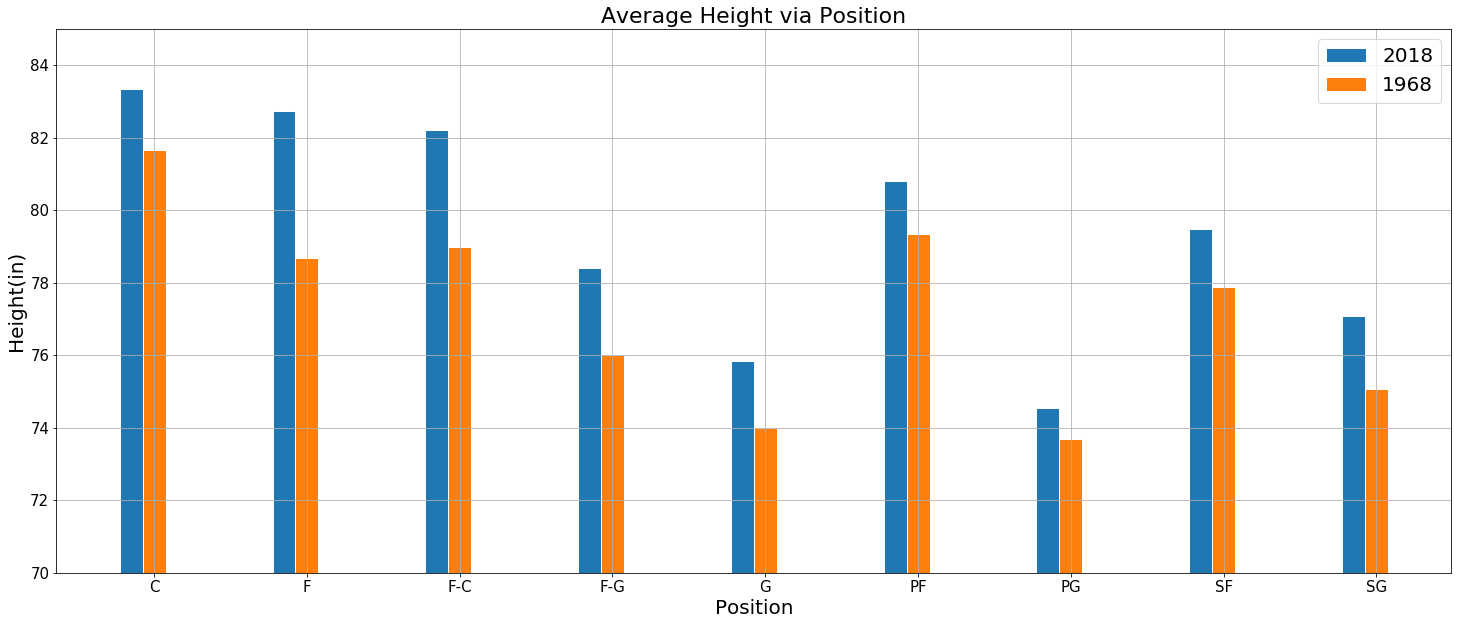

In [56]:
pos = list(range(len(height.index)))
width = 0.15

fig, ax = plt.subplots(figsize=(25,10))

r1 = np.arange(len(height))
r2 = [x + width for x in r1]


plt.bar(r1, height["Height 2018"], width=width, edgecolor='white', label='2018')

plt.bar(r2, height["Height 1968"], width=width, edgecolor='white', label='1968')
plt.ylim([70,85])
plt.xlabel("Position", fontsize=20)
plt.ylabel("Height(in)", fontsize=20)
plt.title("Average Height via Position", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks([r + width for r in range(len(height))], height.index)

plt.grid()
plt.legend(prop={'size':20})
plt.show()

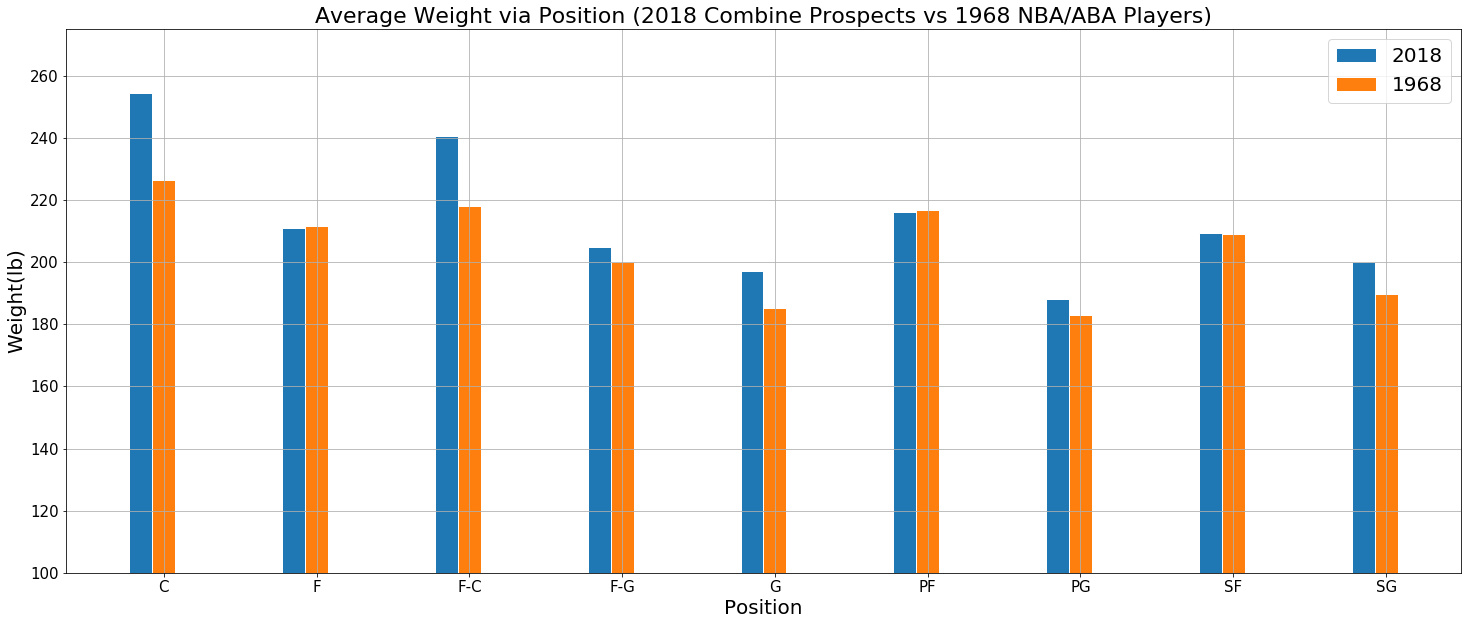

In [55]:
pos = list(range(len(weight.index)))
width = 0.15

fig, ax = plt.subplots(figsize=(25,10))

r1 = np.arange(len(height))
r2 = [x + width for x in r1]


plt.bar(r1, weight["Weight 2018"], width=width, edgecolor='white', label='2018')

plt.bar(r2, weight["Weight 1968"], width=width, edgecolor='white', label='1968')

plt.ylim([100,275])
plt.xlabel("Position", fontsize=20)
plt.ylabel("Weight(lb)", fontsize=20)
plt.title("Average Weight via Position (2018 Combine Prospects vs 1968 NBA/ABA Players)", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xticks([r + width for r in range(len(height))], weight.index)

plt.grid()
plt.legend(prop={'size':20})
plt.show()

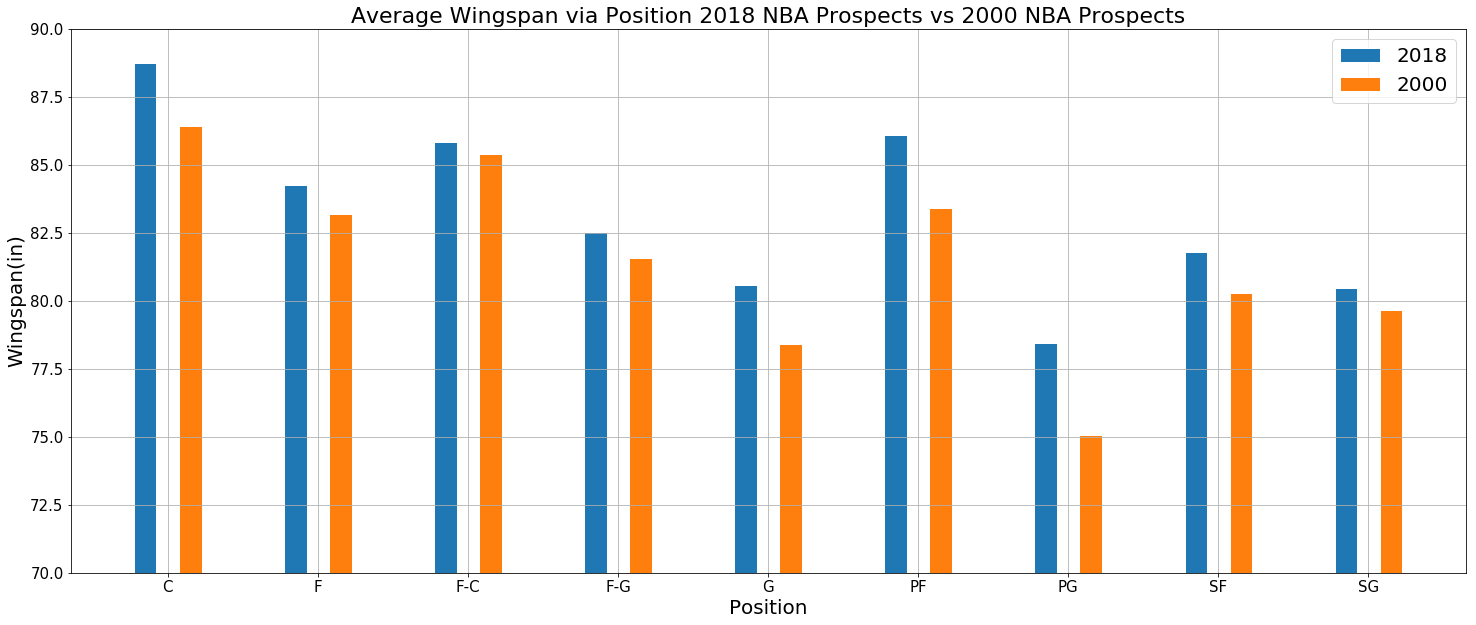

In [54]:
pos = list(range(len(wingspan.index)))
width = 0.15

fig, ax = plt.subplots(figsize=(25,10))

r1 = np.arange(len(wingspan))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]


plt.bar(r1, wingspan["Wingspan 2018"], width=width, edgecolor='white', label='2018')

plt.bar(r3, wingspan["Wingspan 2000"], width=width, edgecolor='white', label='2000')
plt.ylim([70,90])
plt.xlabel("Position", fontsize=20)
plt.ylabel("Wingspan(in)", fontsize=20)
plt.title("Average Wingspan via Position 2018 NBA Prospects vs 2000 NBA Prospects", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks([r + width for r in range(len(wingspan))], wingspan.index)

plt.grid()
plt.legend(prop={'size':20})
plt.show()

In [29]:
alltime = pd.read_csv('positionheight.csv')

alltime.head()

,Year,PG,SG,SF,PF,C
0,2014,73.9,77.0,79.6,81.3,83.1
1,2013,73.8,76.8,79.6,81.2,82.9
2,2012,73.9,77.1,79.7,81.3,82.9
3,2011,73.9,77.2,79.7,81.3,83.0
4,2010,73.8,77.5,79.5,81.3,82.9


In [30]:
alltime["Average Height"] = (alltime['PG'] + alltime['SG'] + alltime['SF'] + alltime['PF'] + alltime['C'])/5
alltime.head()

,Year,PG,SG,SF,PF,C,Average Height
0,2014,73.9,77.0,79.6,81.3,83.1,78.98
1,2013,73.8,76.8,79.6,81.2,82.9,78.86
2,2012,73.9,77.1,79.7,81.3,82.9,78.98
3,2011,73.9,77.2,79.7,81.3,83.0,79.02
4,2010,73.8,77.5,79.5,81.3,82.9,79.00


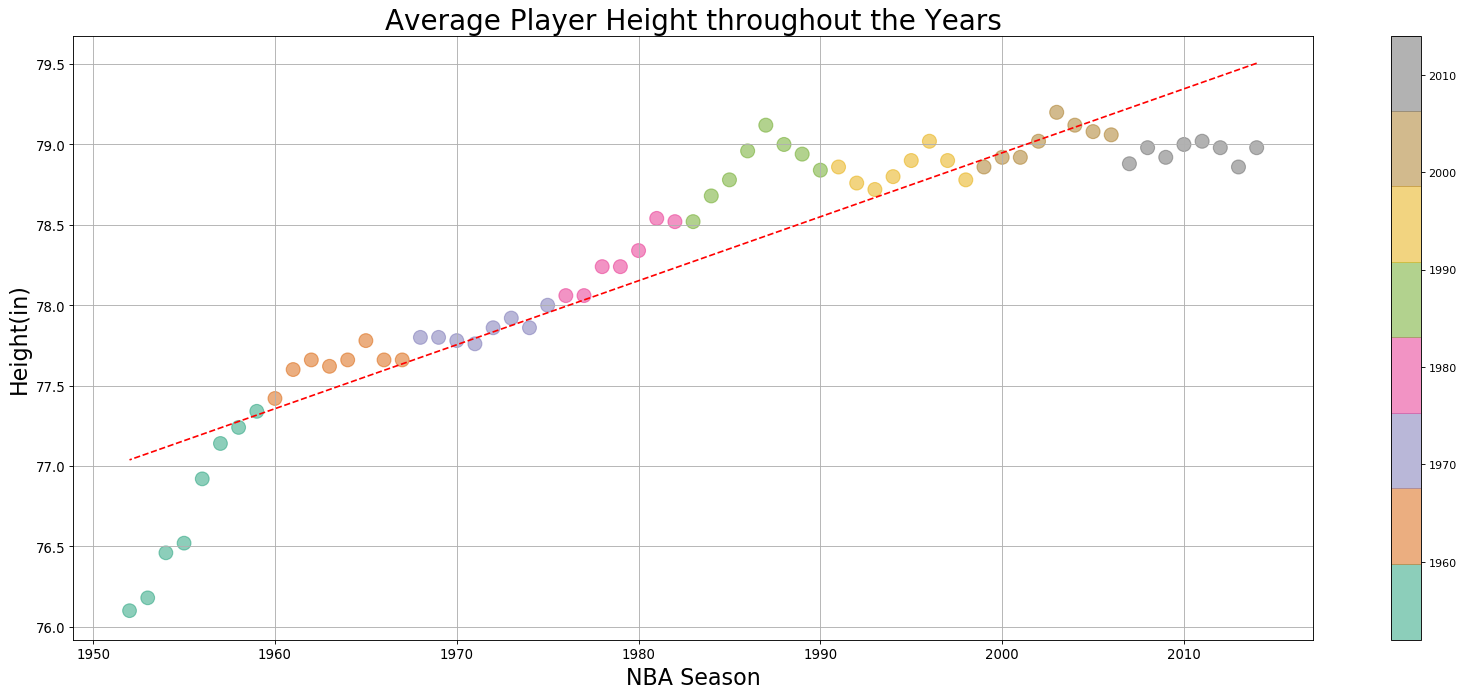

In [37]:
Year = alltime["Year"]
slope, intercept, _, _, _= linregress(Year, alltime["Average Height"])
fit = slope * Year + intercept

x_axis = np.arange(len(alltime["Year"]))
plt.figure(figsize=(25,10), dpi=80)
plt.scatter(Year, alltime["Average Height"], c=Year, s=alltime["Average Height"]*2, cmap='Dark2', alpha=0.5)
plt.plot(Year, fit, 'r--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average Player Height throughout the Years", fontsize=25)
plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Height(in)", fontsize=20)
plt.colorbar()
plt.grid()

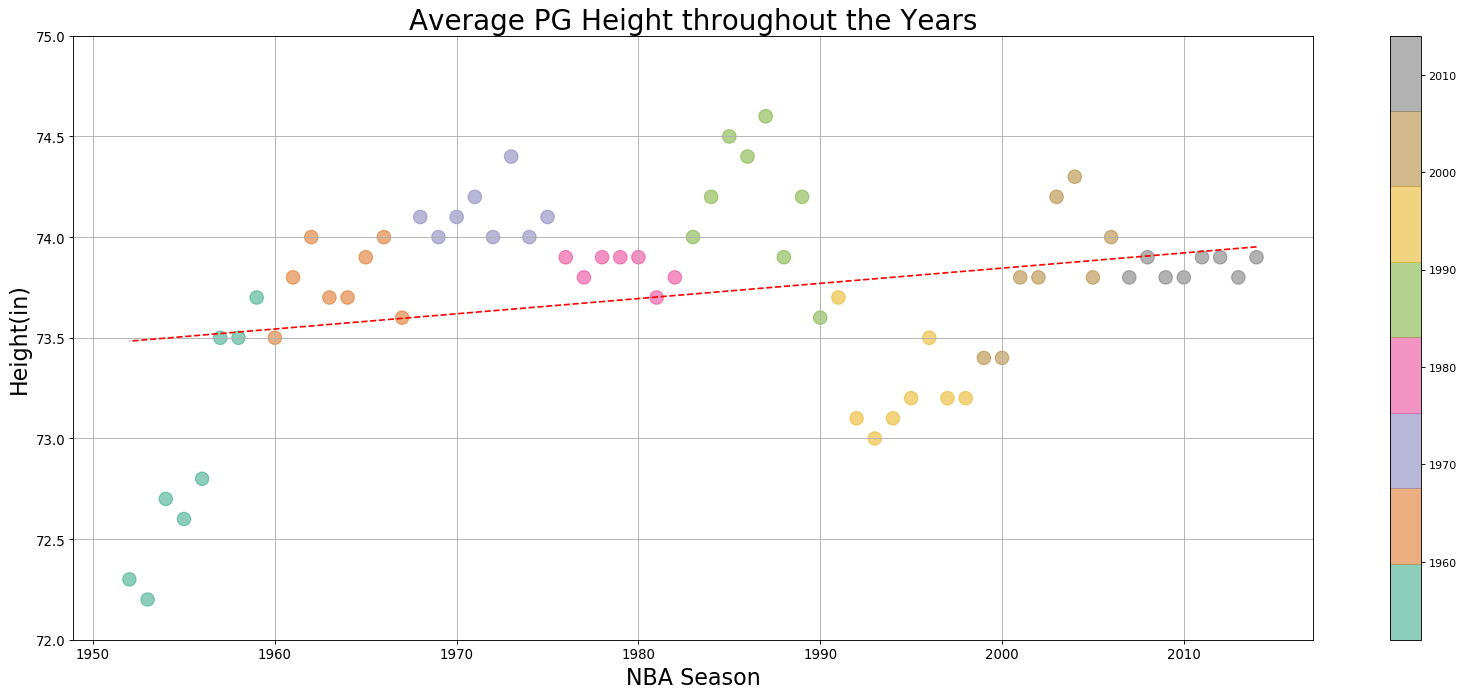

In [38]:
Year = alltime["Year"]
slope, intercept, _, _, _= linregress(Year, alltime["PG"])
fit = slope * Year + intercept

x_axis = np.arange(len(alltime["Year"]))
plt.figure(figsize=(25,10), dpi=80)
plt.scatter(Year, alltime["PG"], c=Year, s=alltime["PG"]*2, cmap='Dark2', alpha=0.5)
plt.plot(Year, fit, 'r--')
plt.ylim(72, 75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average PG Height throughout the Years", fontsize=25)
plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Height(in)", fontsize=20)
plt.colorbar()
plt.grid()

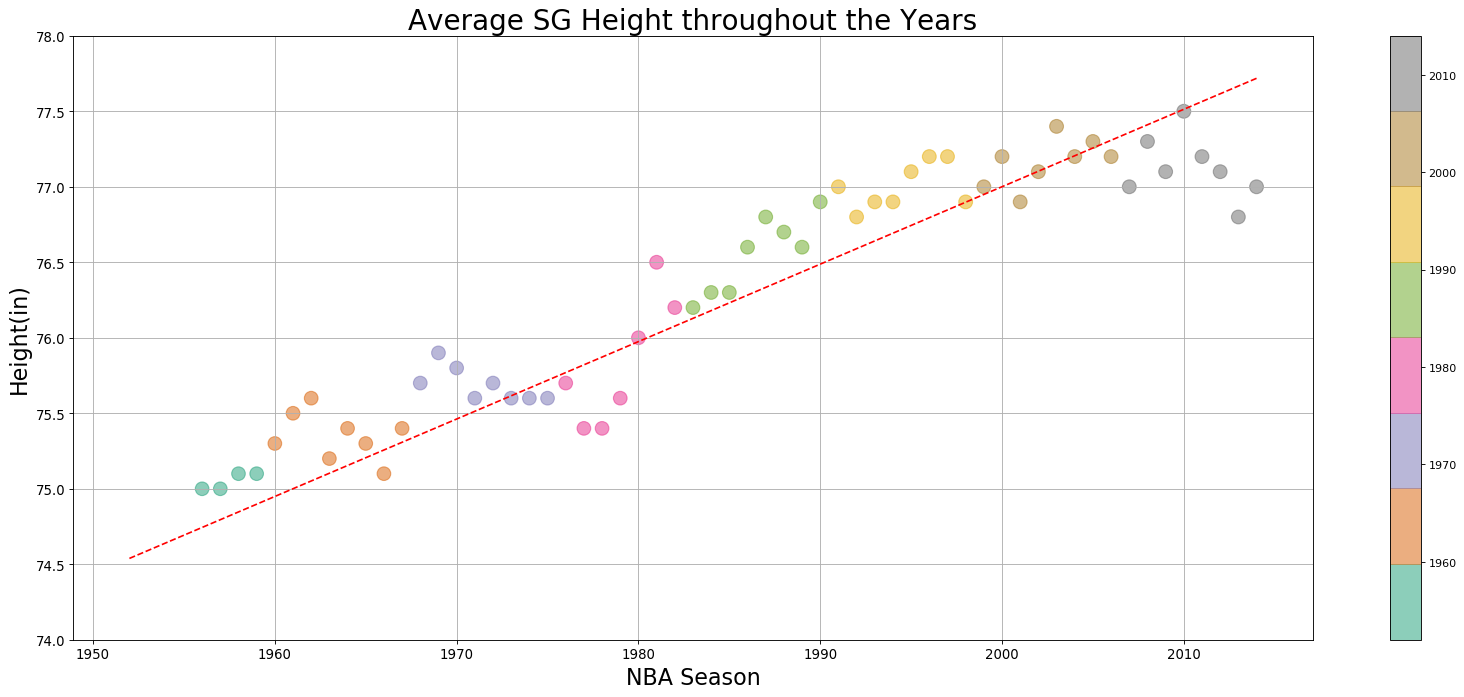

In [39]:
Year = alltime["Year"]
slope, intercept, _, _, _= linregress(Year, alltime["SG"])
fit = slope * Year + intercept

x_axis = np.arange(len(alltime["Year"]))
plt.figure(figsize=(25,10), dpi=80)
plt.scatter(Year, alltime["SG"], c=Year, s=alltime["SG"]*2, cmap='Dark2', alpha=0.5)
plt.plot(Year, fit, 'r--')
plt.ylim(74,78)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average SG Height throughout the Years", fontsize=25)
plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Height(in)", fontsize=20)
plt.colorbar()
plt.grid()

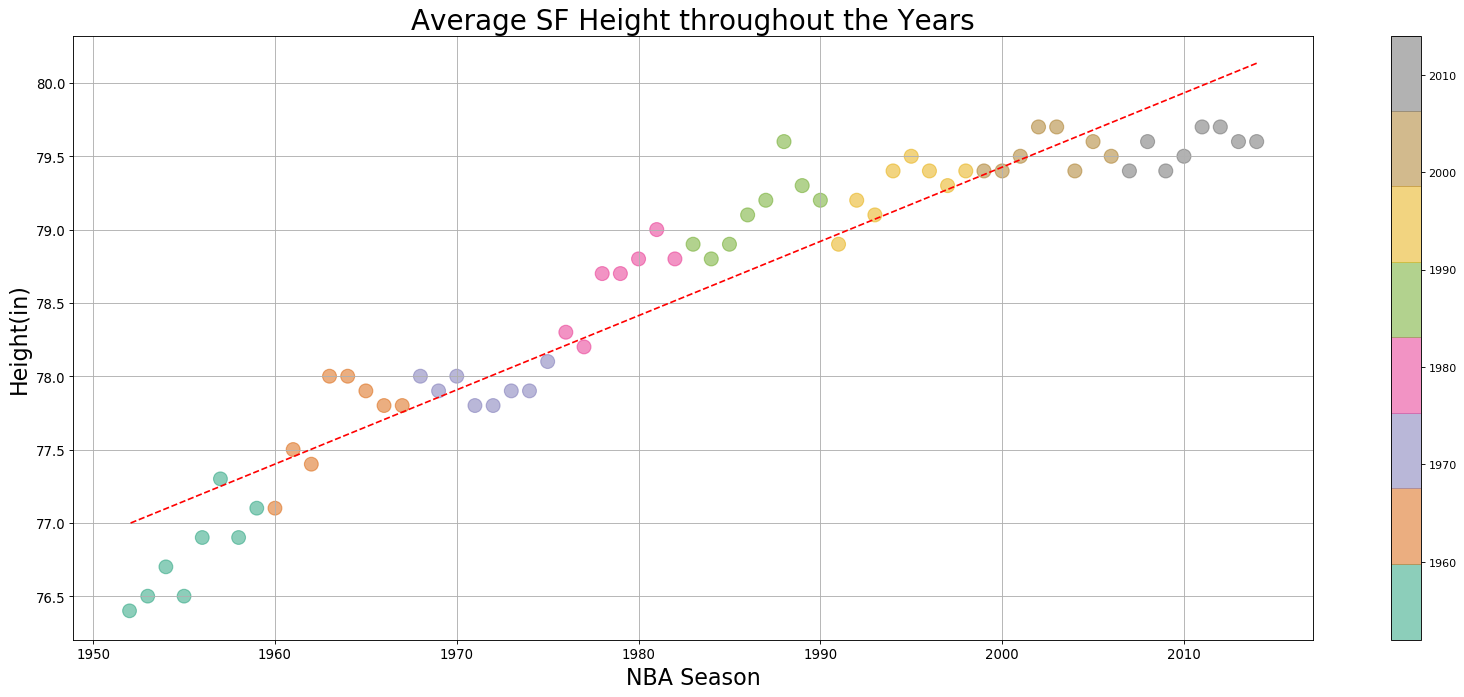

In [40]:
Year = alltime["Year"]
slope, intercept, _, _, _= linregress(Year, alltime["SF"])
fit = slope * Year + intercept

x_axis = np.arange(len(alltime["Year"]))
plt.figure(figsize=(25,10), dpi=80)
plt.scatter(Year, alltime["SF"], c=Year, s=alltime["SF"]*2, cmap='Dark2', alpha=0.5)
plt.plot(Year, fit, 'r--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average SF Height throughout the Years", fontsize=25)
plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Height(in)", fontsize=20)
plt.colorbar()
plt.grid()

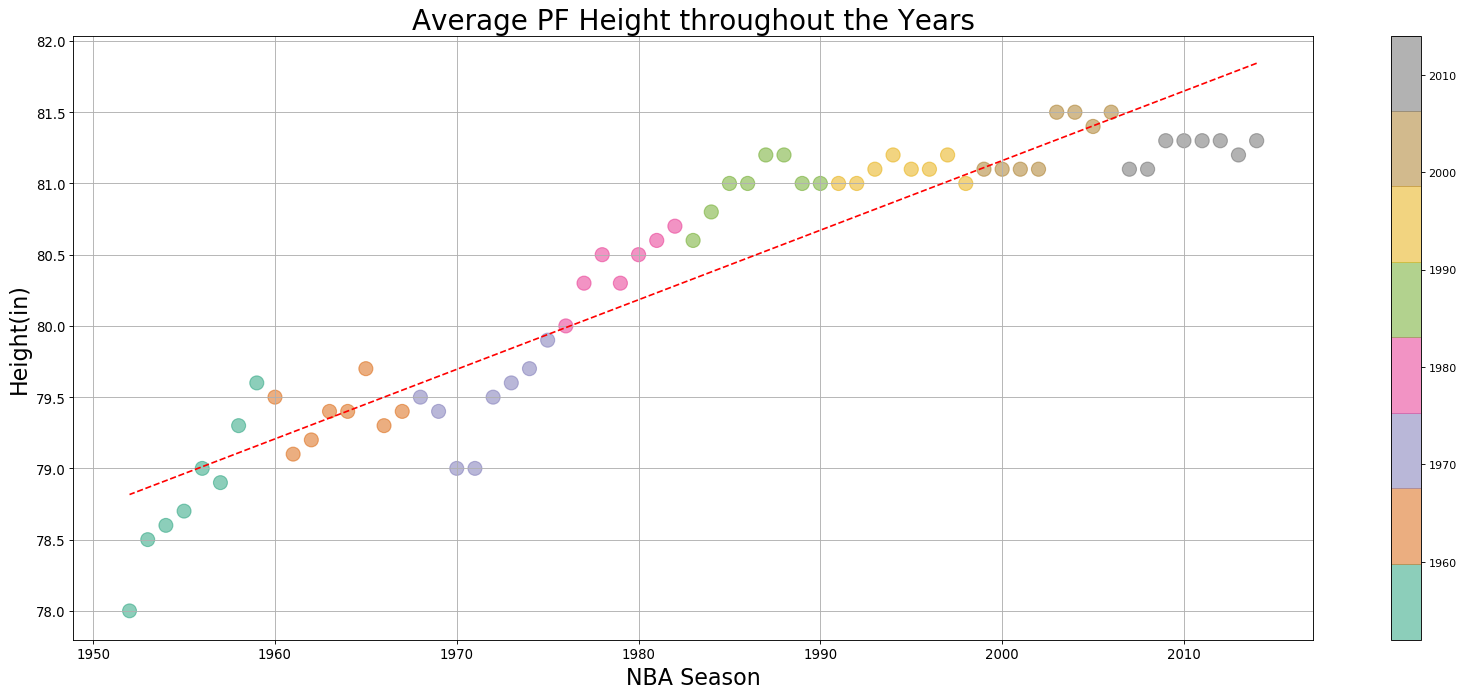

In [41]:
Year = alltime["Year"]
slope, intercept, _, _, _= linregress(Year, alltime["PF"])
fit = slope * Year + intercept

x_axis = np.arange(len(alltime["Year"]))
plt.figure(figsize=(25,10), dpi=80)
plt.scatter(Year, alltime["PF"], c=Year, s=alltime['PF']*2, cmap='Dark2', alpha=0.5)
plt.plot(Year, fit, 'r--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average PF Height throughout the Years", fontsize=25)
plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Height(in)", fontsize=20)
plt.colorbar()
plt.grid()

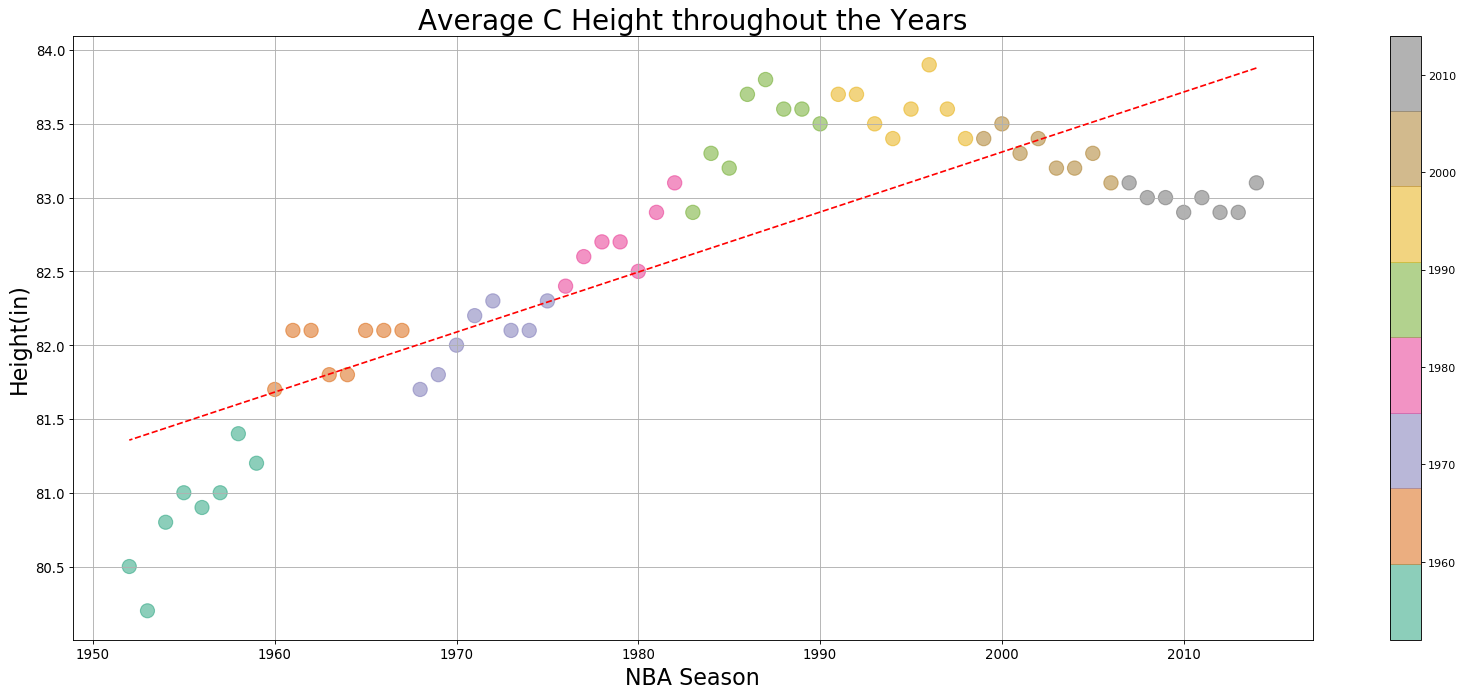

In [42]:
Year = alltime["Year"]
slope, intercept, _, _, _= linregress(Year, alltime["C"])
fit = slope * Year + intercept

x_axis = np.arange(len(alltime["Year"]))
plt.figure(figsize=(25,10), dpi=80)
plt.scatter(Year, alltime["C"], c=Year, s=alltime["C"]*2, cmap='Dark2', alpha=0.5)
plt.plot(Year, fit, 'r--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average C Height throughout the Years", fontsize=25)
plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Height(in)", fontsize=20)
plt.colorbar()
plt.grid()